## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Baixar dados

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("cherngs/heart-disease-cleveland-uci")

print("Path to dataset files:", path)

100%|██████████| 3.33k/3.33k [00:00<00:00, 5.65MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/cherngs/heart-disease-cleveland-uci/versions/1


In [ ]:
data= pd.read_csv(path + "/heart_cleveland_upload.csv")

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [ ]:
data.duplicated().sum()

np.int64(0)

Variáveis:

---
**Variáveis Clínicas:**

* age: age in years // **quantitativa discreta**
* sex: sex (1 = male; 0 = female) // **qualitativa nominal**
* cp: chest pain type // **qualitativa nominal**
    * Value 0: typical angina
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: asymptomatic

---
**Variáveis de Teste de Esforço:**
* thalach: maximum heart rate achieved // **quantitativa contínua**
* exang: exercise induced angina (1 = yes; 0 = no) // **qualitativa nominal**
* oldpeak = ST depression induced by exercise relative to rest // **quantitativa contínua**
* slope: the slope of the peak exercise ST segment // **qualitativa nominal**
    * Value 0: upsloping
    * Value 1: flat
    * Value 2: downsloping

---
**Variáveis de Imagem e Anatomia:**
* ca: number of major vessels (0-3) colored by flourosopy // **quantitativa discreta**
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect // **qualitativa nominal**

condition: 0 = no disease, 1 = disease // **qualitativa nominal**

---
**Outras Variáveis de Risco:**

* trestbps: resting blood pressure (in mm Hg on admission to the hospital) // **quantitativa contínua**
* chol: serum cholestoral in mg/dl // **quantitativa contínua**
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) // **qualitativa nominal**
* restecg: resting electrocardiographic results // **qualitativa nominal**
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria



## Análise Exploratória de Dados

### Análise Univariada

#### Age

In [ ]:
age = data['age']

display(age.describe())

,age
count,297.000000
mean,54.542088
std,9.049736
min,29.000000
25%,48.000000
50%,56.000000
75%,61.000000
max,77.000000


In [ ]:
print(f'Curtose : {age.kurtosis():.2f}')
print(f'Assimetria : {age.skew():.2f}')

Curtose : -0.52
Assimetria : -0.22


/tmp/ipython-input-1095524560.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


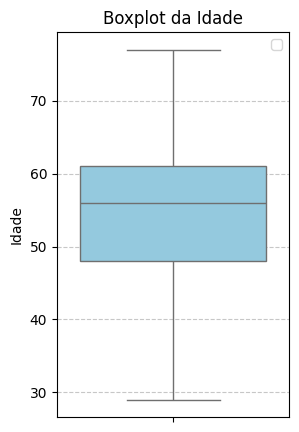

In [ ]:
# Create a boxplot for 'age'
plt.figure(figsize=(3, 5))
sns.boxplot(y=age, color='skyblue')

plt.title('Boxplot da Idade')
plt.ylabel('Idade')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

A distribuição das idades é levemente assimétrica à direita, ou seja, há mais pacientes jovens no dataset;

A curtose é negativa, ou seja, a distribuição é "mais achatada" que a distribuição normal; (isso é esperado, já que o histograma sugere bimodalidade)

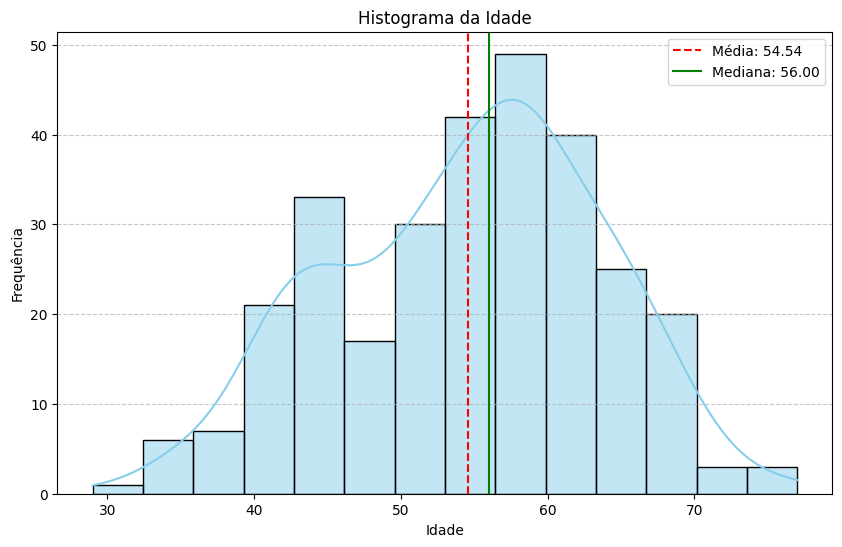

In [ ]:
# Calculate statistics for 'age'
age_stats = age.describe()
median_age = age.median()
mean_age = age.mean()

# Create a histogram for 'age'
plt.figure(figsize=(10, 6))
sns.histplot(age, bins=14, kde=True, color='skyblue', edgecolor='black')

# Add mean and median lines
plt.axvline(mean_age, color='red', linestyle='--', label=f'Média: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='-', label=f'Mediana: {median_age:.2f}')

plt.title('Histograma da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

O histograma sugere uma distribuição bimodal.

Há dois picos, um por volta dos 45 anos e outro por volta dos 58 anos;

Análises posteriores (análise bivariada ou multivariada) serão necessárias para verificar se existem dois grupos distintos no dataset que expliquem essa bimodalidade.

#### Sex

In [ ]:
sex= data['sex']

sex.value_counts()

,count
sex,
1,201
0,96


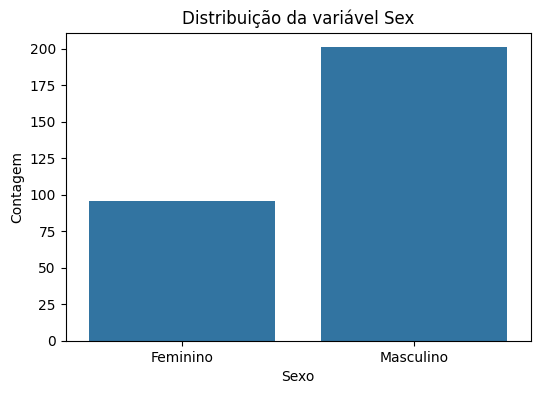

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=sex)
plt.title('Distribuição da variável Sex')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['Feminino', 'Masculino'])
plt.show()

No dataset, os homens representam cerca de 67% dos pacientes analisados;

#### cp

* **Angina Típica**: Atende a três critérios (localização atrás do osso do peito, provocada por esforço/estresse e aliviada por repouso).

* **Angina Atípica**: Atende a apenas dois desses critérios.

* **Dor Não Anginosa**: Atende a apenas um ou nenhum dos critérios, sugerindo que a causa pode ser muscular ou gástrica (não cardíaca.

* **Assintomático**: O paciente não sente dor, mas o médico ainda assim solicitou os exames devido a outros fatores de risco (como idade ou histórico familiar).

In [ ]:
# 1. Extrair a coluna
cp = data['cp']

# 2. Definir o mapeamento
mapeamento_cp = {
    0: 'Angina típica',
    1: 'Angina atípica',
    2: 'Dor não anginosa',
    3: 'Assintomático'
}

# 3. Substituir (Ajustado: tirei o ['cp'] extra)
cp = cp.replace(mapeamento_cp)

# 4. Verificar a contagem
cp.value_counts()

,count
cp,
Assintomático,142
Dor não anginosa,83
Angina atípica,49
Angina típica,23


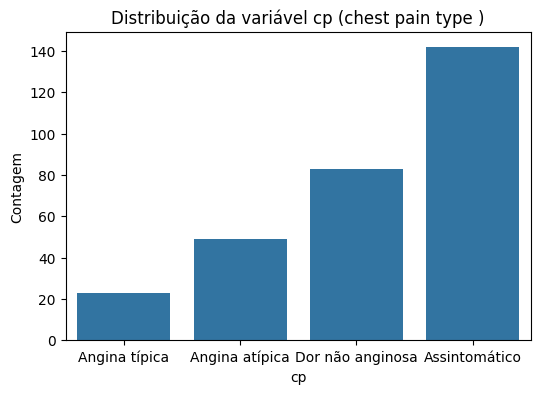

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=cp)
plt.title('Distribuição da variável cp (chest pain type )')
plt.xlabel('cp')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Angina típica', 'Angina atípica',
                                       'Dor não anginosa', 'Assintomático'])
plt.show()

In [ ]:
proportions_cp = cp.value_counts(normalize=True) * 100
display(proportions_cp)

,proportion
cp,
Assintomático,47.811448
Dor não anginosa,27.946128
Angina atípica,16.498316
Angina típica,7.744108


As proporções indicam que a maioria das pessoas analisadas no estudo não sentiam dores, ou sentiam dores que não sugeriam origem cardíaca. Esses pacientes eram os que se havia maior dúvida quanto ao diagnóstico, então faz sentido serem em maior numero.

Os casos urgentes (angina instável) foram excluídos do estudo, ou seja, provavelmente alguns pacientes com angina típica estavam em risco de infarto, então foram direto para a cirurgia (pois não seria adequado submetê-los aos testes).

Isso explica a disposição das proporções no dataset.




#### thalach

Frequência cardíaca máxima atingida antes da exaustão ou sintomas (no teste de esforço).

Em pessoas normais a frequência cardíaca máxima tende a maior (algo entre 160bpm e 190bpm)

Mas, em pessoas doentes, o teste é interrompido precocemente, devido a alguns sintomas, resultando em uma frequência cardíaca máxima muito mais baixo que o usual.

In [ ]:
thalach= data['thalach']

thalach.describe()

,thalach
count,297.000000
mean,149.599327
std,22.941562
min,71.000000
25%,133.000000
50%,153.000000
75%,166.000000
max,202.000000


In [ ]:
print(f'Curtose : {thalach.kurtosis():.2f}')
print(f'Assimetria : {thalach.skew():.2f}')

Curtose : -0.05
Assimetria : -0.54


A distribuição possui assimetria negativa moderada, ou seja, há um maior número de indivíduos com altos valores de freq. cardíaca máxima (possivelmente saudáveis), em relaçao aos que possuem valores mais baixos (doentes)

/tmp/ipython-input-3833250999.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


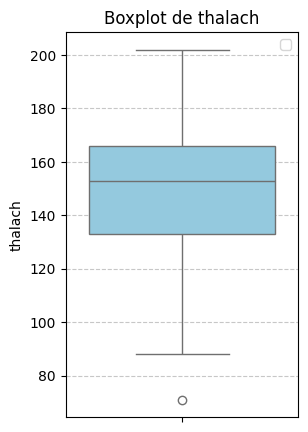

In [ ]:
# Create a boxplot for 'thalach'
plt.figure(figsize=(3, 5))
sns.boxplot(y=thalach, color='skyblue')

plt.title('Boxplot de thalach')
plt.ylabel('thalach')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

É possível observar a presença de um ponto que excede o limite inferior do boxplot (Q1 - 1,5*IQR). Embora o critério estatístico de Tukey o rotule como um outlier, ele não deve ser interpretado como um erro de medição ou falha na coleta.

Esta classificação ocorre porque o boxplot padrão é uma ferramenta desenhada para distribuições simétricas, o que não é o caso. Em dados clínicos de cardiologia, esse valor representa um comportamento biológico real: pacientes com baixa tolerância ao esforço ou isquemia severa, que interrompem o teste precocemente.

Portanto, o boxplot é considerado aqui uma métrica inadequada para a exclusão de dados, e o ponto foi mantido por representar um caso crítico fundamental para o aprendizado do modelo.

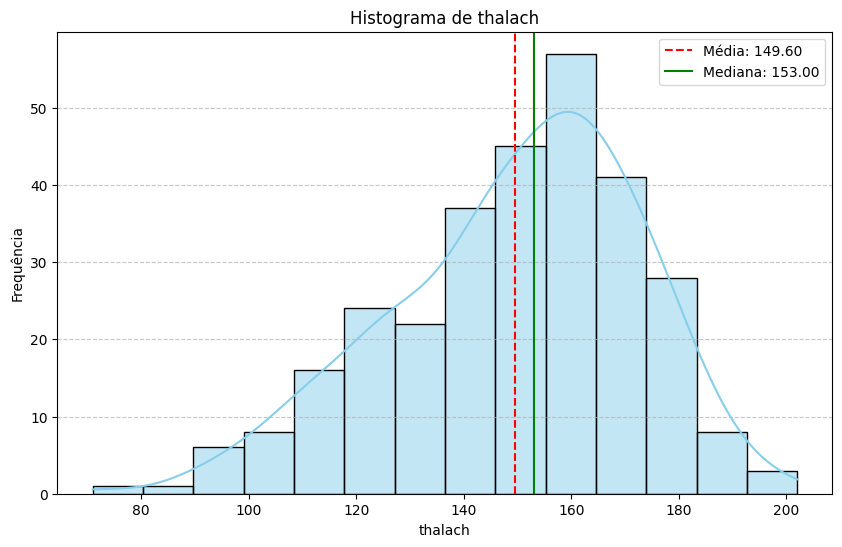

In [ ]:
# Calculate statistics for 'athalachge'
thalach_stats = thalach.describe()
median_thalach = thalach.median()
mean_thalach = thalach.mean()

# Create a histogram for 'thalach'
plt.figure(figsize=(10, 6))
sns.histplot(thalach, bins=14, kde=True, color='skyblue', edgecolor='black')

# Add mean and median lines
plt.axvline(mean_thalach, color='red', linestyle='--', label=f'Média: {mean_thalach:.2f}')
plt.axvline(median_thalach, color='green', linestyle='-', label=f'Mediana: {median_thalach:.2f}')

plt.title('Histograma de thalach')
plt.xlabel('thalach')
plt.ylabel('Frequência')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### exang

Indica se o paciente sentiu angina (dor) durante o exercício

In [ ]:
exang= data['exang']

exang.value_counts()

,count
exang,
0,200
1,97


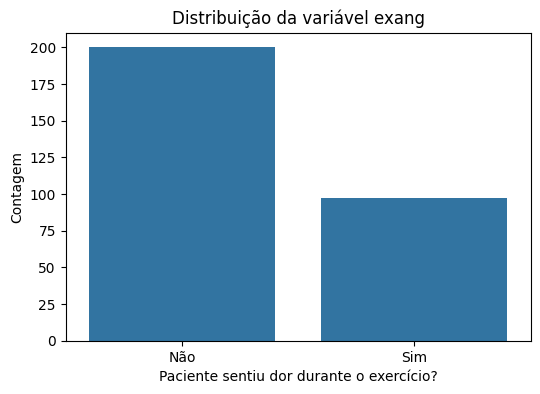

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=exang)
plt.title('Distribuição da variável exang')
plt.xlabel('Paciente sentiu dor durante o exercício?')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])
plt.show()

A maioria dos pacientes analisados (67%) não sentiram dor durante o exercício.

#### oldpeak

diferença entre a posição do segmento ST (ECG) no repouso e no pico do esforço (thalac)

quanto maior essa diferença, maior é a área do coração que sofre por falta de sangue (isquemia)

In [ ]:
oldpeak= data['oldpeak']

oldpeak.describe()

,oldpeak
count,297.000000
mean,1.055556
std,1.166123
min,0.000000
25%,0.000000
50%,0.800000
75%,1.600000
max,6.200000


In [ ]:
print(f'Curtose : {oldpeak.kurtosis():.2f}')
print(f'Assimetria : {oldpeak.skew():.2f}')

Curtose : 1.51
Assimetria : 1.25


A distribuição possui assimetria positiva forte, ou seja, a maioria dos dados possuem valor baixo de oldpeak (zero ou próximo de zero)(isso é refletido nos quartis); E possui curtose leptocúrtica, ou seja, há um pico gigante nos valores baixos de oldpeak, que decresce rapidamente conforme o valor de oldpeak aumenta;



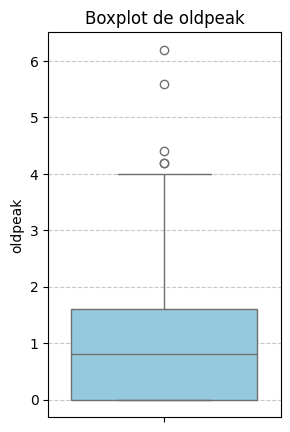

In [ ]:
# Create a boxplot for 'oldpeak'
plt.figure(figsize=(3, 5))
sns.boxplot(y=oldpeak, color='skyblue')

plt.title('Boxplot de oldpeak')
plt.ylabel('oldpeak')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Como a curtose e a assimetria são altas, é esperado observar valores fora do limite superior do boxplot, mas tais pontos não são erros de medições, eles fazem parte da variabilidade natural dos dados. Tais valores representam os pacientes que possuem isquemia grave

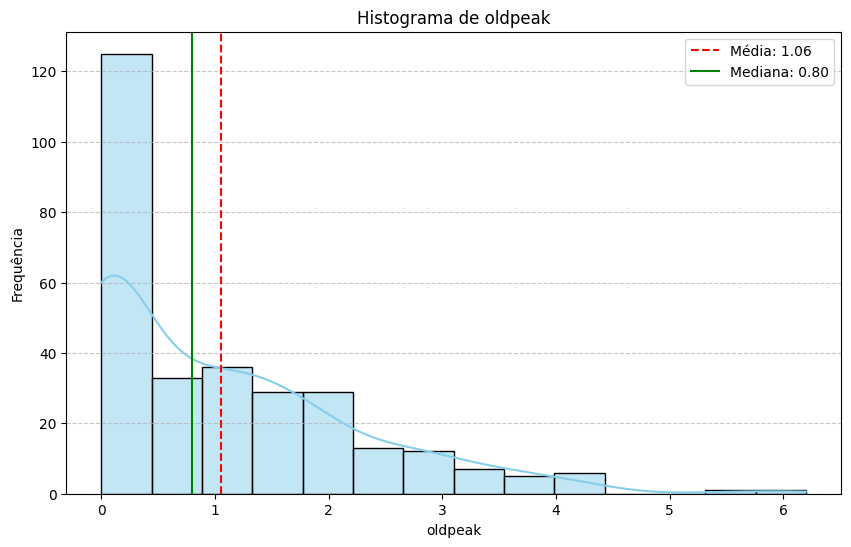

In [ ]:
# Calculate statistics for 'oldpeak'
oldpeak_stats = oldpeak.describe()
median_oldpeak = oldpeak.median()
mean_oldpeak = oldpeak.mean()

# Create a histogram for 'oldpeak'
plt.figure(figsize=(10, 6))
sns.histplot(oldpeak, bins=14, kde=True, color='skyblue', edgecolor='black')

# Add mean and median lines
plt.axvline(mean_oldpeak, color='red', linestyle='--', label=f'Média: {mean_oldpeak:.2f}')
plt.axvline(median_oldpeak, color='green', linestyle='-', label=f'Mediana: {median_oldpeak:.2f}')

plt.title('Histograma de oldpeak')
plt.xlabel('oldpeak')
plt.ylabel('Frequência')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

a cauda longa à direita representa a minoria de pacientes que atingiram níveis críticos de isquemia no pico do esforço.

#### slope

Enquanto o oldpeak diz o quanto a linha afundou, o slope diz como ela se comporta logo após o afundamento. Existem três tipos principais de inclinação:

* Value 0: **Upsloping (Ascendente)**: A linha afunda, mas sobe rápido. É comum em exercícios intensos e nem sempre indica doença grave.

* Value 1: **Flat (Plano)**: A linha afunda e fica "reta". É um sinal clássico e preocupante de isquemia.

* Value 2: **Downsloping (Descendente)**: A linha afunda e continua descendo. É o sinal mais grave de todos, indicando que o coração está em alto sofrimento isquêmico. (mesmo após a interrupção do esforço)

In [ ]:
slope= data['slope']

slope.value_counts()

,count
slope,
0,139
1,137
2,21


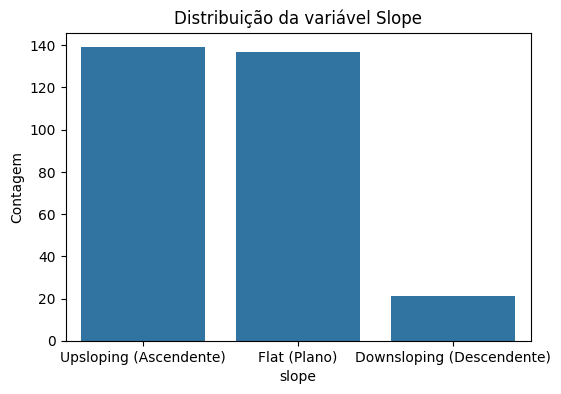

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=slope)
plt.title('Distribuição da variável Slope')
plt.xlabel('slope')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1, 2], labels=['Upsloping (Ascendente)', 'Flat (Plano)', 'Downsloping (Descendente)'])
plt.show()

Os casos de downsloping no dataset são muito mais raros (7%) em relação aos casos de upsloping e flat;

Há maioria dos pacientes possuem coração que se recuperam rápido (upsloping);

Entretanto, grande parte dos pacientes sapresentaram sinal clássico de isquemia durante o esforço (flat)

#### ca

Número de vasos principais com depósitos de cálcio ou interrupções no fluxo.

0: Nenhuma calcificação significativa (indício de artérias limpas)

1, 2 ou 3: Indica que a doença está presente em um, dois ou três vasos principais.

In [ ]:
ca= data['ca']

ca.value_counts()

,count
ca,
0,174
1,65
2,38
3,20


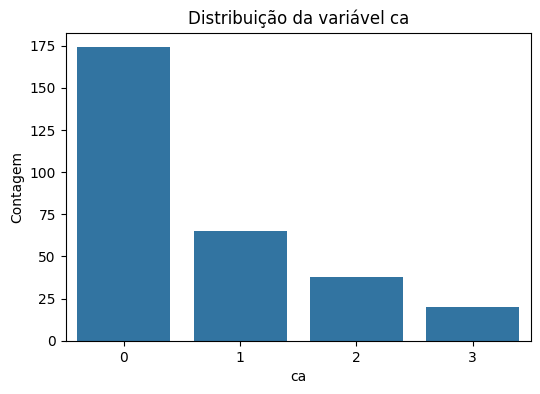

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=ca)
plt.title('Distribuição da variável ca')
plt.xlabel('ca')
plt.ylabel('Contagem')
plt.show()


A maioria dos pacientes (58%) não apresentou vasos calcificados

O restante (42%) apresentou pelo menos 1 vaso calcificado.



#### thal

Avalia se o sangue está chegando a todas as partes do coração durante o repouso e após o esforço.

**0 = Normal**: O contraste se distribui uniformemente por todo o coração.

**1 = Fixed Defect (Defeito Fixo)**: Uma parte do coração não recebe o contraste nem no esforço, nem no repouso. Isso geralmente indica tecido morto (cicatriz de um infarto antigo).

**2 = Reversable Defect (Defeito Reversível)**: O coração parece normal em repouso, mas "falta sangue" em alguma região durante o esforço. Isso é o sinal clássico de isquemia ativa: a artéria está entupida, mas o tecido ainda está vivo e sofrendo.


In [ ]:
thal= data['thal']

thal.value_counts()

,count
thal,
0,164
2,115
1,18


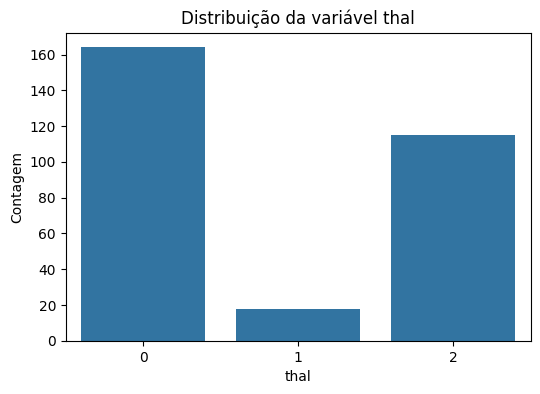

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=thal)
plt.title('Distribuição da variável thal')
plt.xlabel('thal')
plt.ylabel('Contagem')
plt.show()


#### condition

In [ ]:
condition= data['condition']

condition.value_counts()

,count
condition,
0,160
1,137


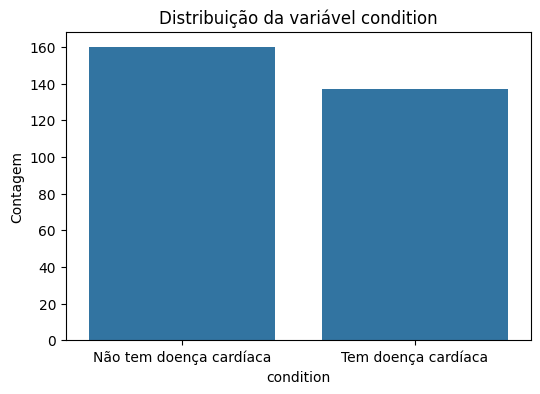

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=condition)
plt.title('Distribuição da variável condition')
plt.xticks(ticks=[0, 1], labels=['Não tem doença cardíaca', 'Tem doença cardíaca'])
plt.xlabel('condition')
plt.ylabel('Contagem')
plt.show()


é possível observar que a classe alvo é levemente desbalanceada, mas nada alarmante

#### trestbps

É a pressão arterial medida no momento da internação.

In [ ]:
trestbps= data['trestbps']

trestbps.describe()

,trestbps
count,297.000000
mean,131.693603
std,17.762806
min,94.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


In [ ]:
print(f'Curtose : {trestbps.kurtosis():.2f}')
print(f'Assimetria : {trestbps.skew():.2f}')

Curtose : 0.81
Assimetria : 0.70


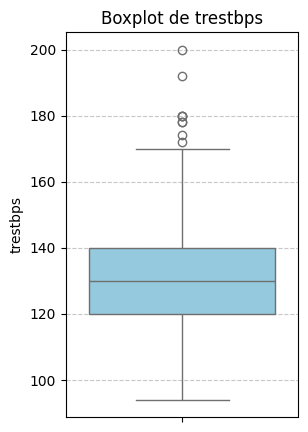

In [ ]:
# Create a boxplot for 'trestbps'
plt.figure(figsize=(3, 5))
sns.boxplot(y=trestbps, color='skyblue')

plt.title('Boxplot de trestbps')
plt.ylabel('trestbps')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

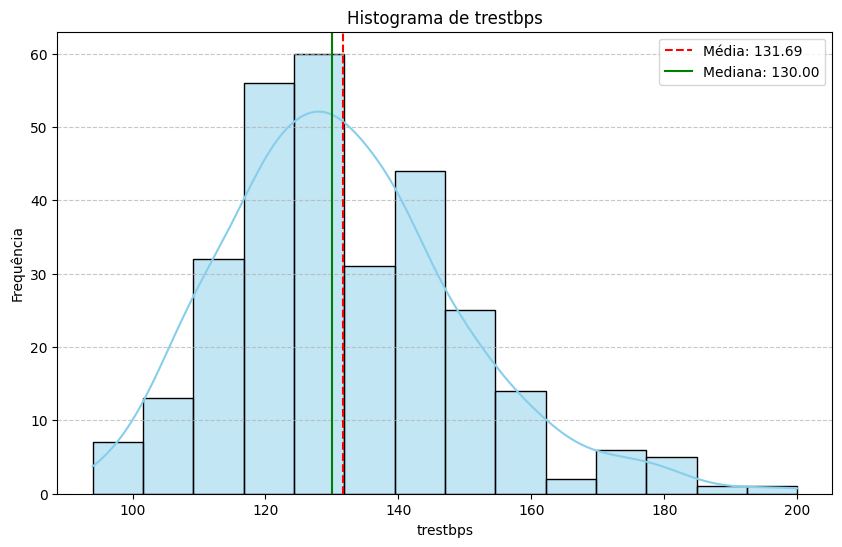

In [ ]:
# Calculate statistics for 'trestbps'
trestbps_stats = trestbps.describe()
median_trestbps = trestbps.median()
mean_trestbps = trestbps.mean()

# Create a histogram for 'trestbps'
plt.figure(figsize=(10, 6))
sns.histplot(trestbps, bins=14, kde=True, color='skyblue', edgecolor='black')

# Add mean and median lines
plt.axvline(mean_trestbps, color='red', linestyle='--', label=f'Média: {mean_trestbps:.2f}')
plt.axvline(median_trestbps, color='green', linestyle='-', label=f'Mediana: {median_trestbps:.2f}')

plt.title('Histograma de trestbps')
plt.xlabel('trestbps')
plt.ylabel('Frequência')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### chol

nível total de colesterol no sangue.

In [ ]:
chol= data['chol']

chol.describe()

,chol
count,297.000000
mean,247.350168
std,51.997583
min,126.000000
25%,211.000000
50%,243.000000
75%,276.000000
max,564.000000


In [ ]:
print(f'Curtose : {chol.kurtosis():.2f}')
print(f'Assimetria : {chol.skew():.2f}')

Curtose : 4.44
Assimetria : 1.12


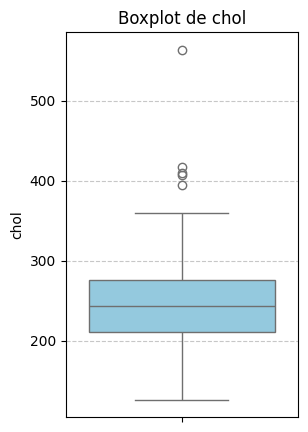

In [ ]:
# Create a boxplot for 'chol'
plt.figure(figsize=(3, 5))
sns.boxplot(y=chol, color='skyblue')

plt.title('Boxplot de chol')
plt.ylabel('chol')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

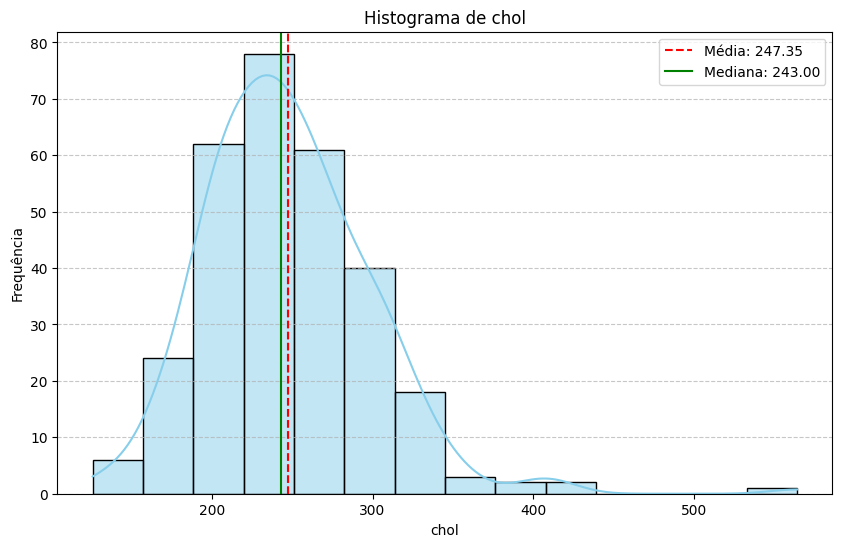

In [ ]:
# Calculate statistics for 'chol'
chol_stats = chol.describe()
median_chol = chol.median()
mean_chol = chol.mean()

# Create a histogram for 'chol'
plt.figure(figsize=(10, 6))
sns.histplot(chol, bins=14, kde=True, color='skyblue', edgecolor='black')

# Add mean and median lines
plt.axvline(mean_chol, color='red', linestyle='--', label=f'Média: {mean_chol:.2f}')
plt.axvline(median_chol, color='green', linestyle='-', label=f'Mediana: {median_chol:.2f}')

plt.title('Histograma de chol')
plt.xlabel('chol')
plt.ylabel('Frequência')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### fbs

Glicemia de Jejum >= 120mg/dl

In [ ]:
fbs= data['fbs']

fbs.value_counts()

,count
fbs,
0,254
1,43


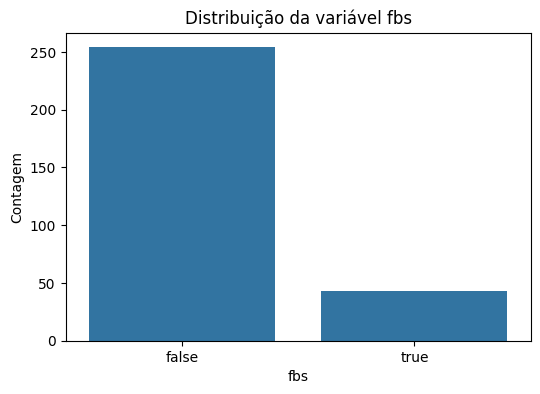

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=fbs)
plt.title('Distribuição da variável fbs')
plt.xticks(ticks=[0, 1], labels=['false', 'true'])
plt.xlabel('fbs')
plt.ylabel('Contagem')
plt.show()


#### restecg

Value 0 (Normal): O coração em repouso não apresenta irregularidades elétricas.

Value 1 (Anormalidade de Onda ST-T): O coração já mostra sinais de sofrimento mesmo sem fazer esforço. É um sinal de alerta precoce.

Value 2 (Hipertrofia Ventricular Esquerda): Indica que o músculo do coração está "inchado" (grosso), geralmente por ter que fazer muita força para bombear o sangue contra uma pressão alta crônica.

In [ ]:
restecg= data['restecg']

restecg.value_counts()

,count
restecg,
0,147
2,146
1,4


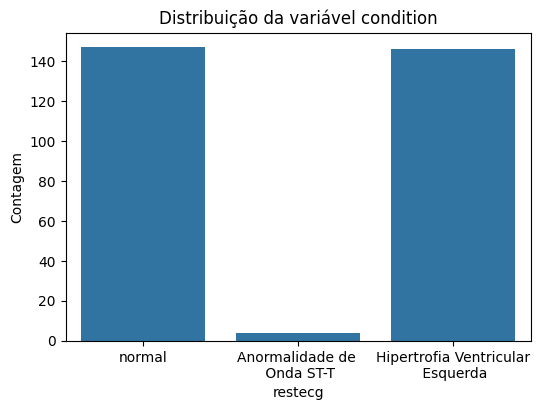

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=restecg)
plt.title('Distribuição da variável condition')
plt.xticks(ticks=[0, 1, 2], labels=['normal', 'Anormalidade de \n Onda ST-T', 'Hipertrofia Ventricular\n Esquerda'],)
plt.xlabel('restecg')
plt.ylabel('Contagem')
plt.show()


### Análise bivariada (target)

#### Quantitativa vs quantitativa (análise de correlação)

Como a maioria das variáveis são assimétricas e não normais, optamos por usar o coeficiente de correlação de Spearman

In [ ]:
from scipy.stats import spearmanr

def create_custom_pair_plot(df, quantitative_vars, figsize=(15, 15)):
    n_vars = len(quantitative_vars)
    fig, axes = plt.subplots(n_vars, n_vars, figsize=figsize)
    fig.suptitle('Matriz de Gráficos de Pares Personalizada', y=1.02, fontsize=16)

    for i in range(n_vars):
        for j in range(n_vars):
            ax = axes[i, j]

            # Diagonal: Histograma
            if i == j:
                sns.histplot(df[quantitative_vars[i]], kde=True, ax=ax, color='skyblue', edgecolor='black')
                ax.set_ylabel('')
                ax.set_xlabel('')
                ax.set_title(f'Distribuição de {quantitative_vars[i]}')

            # Parte Inferior: Scatterplot
            elif i > j:
                sns.scatterplot(x=df[quantitative_vars[j]], y=df[quantitative_vars[i]], ax=ax, color='steelblue')
                ax.set_xlabel(quantitative_vars[j], fontsize=10)
                ax.set_ylabel(quantitative_vars[i], fontsize=10)
                ax.tick_params(axis='x', labelsize=8)
                ax.tick_params(axis='y', labelsize=8)

            # Parte Superior: Coeficiente de Correlação de Spearman
            else:
                # Remover eixos e rótulos para a parte superior, onde serão exibidos os coeficientes
                ax.set_visible(False)

                # Calculate Spearman correlation
                corr, p_value = spearmanr(df[quantitative_vars[i]], df[quantitative_vars[j]])

                # Create a new, invisible ax to display text centrally
                text_ax = fig.add_subplot(n_vars, n_vars, i * n_vars + j + 1)
                text_ax.set_xticks([])
                text_ax.set_yticks([])
                text_ax.set_frame_on(False)

                text_color = 'red' if abs(corr) > 0.5 and p_value < 0.05 else 'black'

                text_ax.text(0.5, 0.6, f'Corr: {corr:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=12, color=text_color)
                text_ax.text(0.5, 0.4, f'P-val: {p_value:.3f}', horizontalalignment='center', verticalalignment='center', fontsize=10, color=text_color)
                text_ax.set_title(f'{quantitative_vars[j]} vs {quantitative_vars[i]}', fontsize=10)
    plt.tight_layout()
    plt.show()

print("A função 'create_custom_pair_plot' foi definida.")

A função 'create_custom_pair_plot' foi definida.


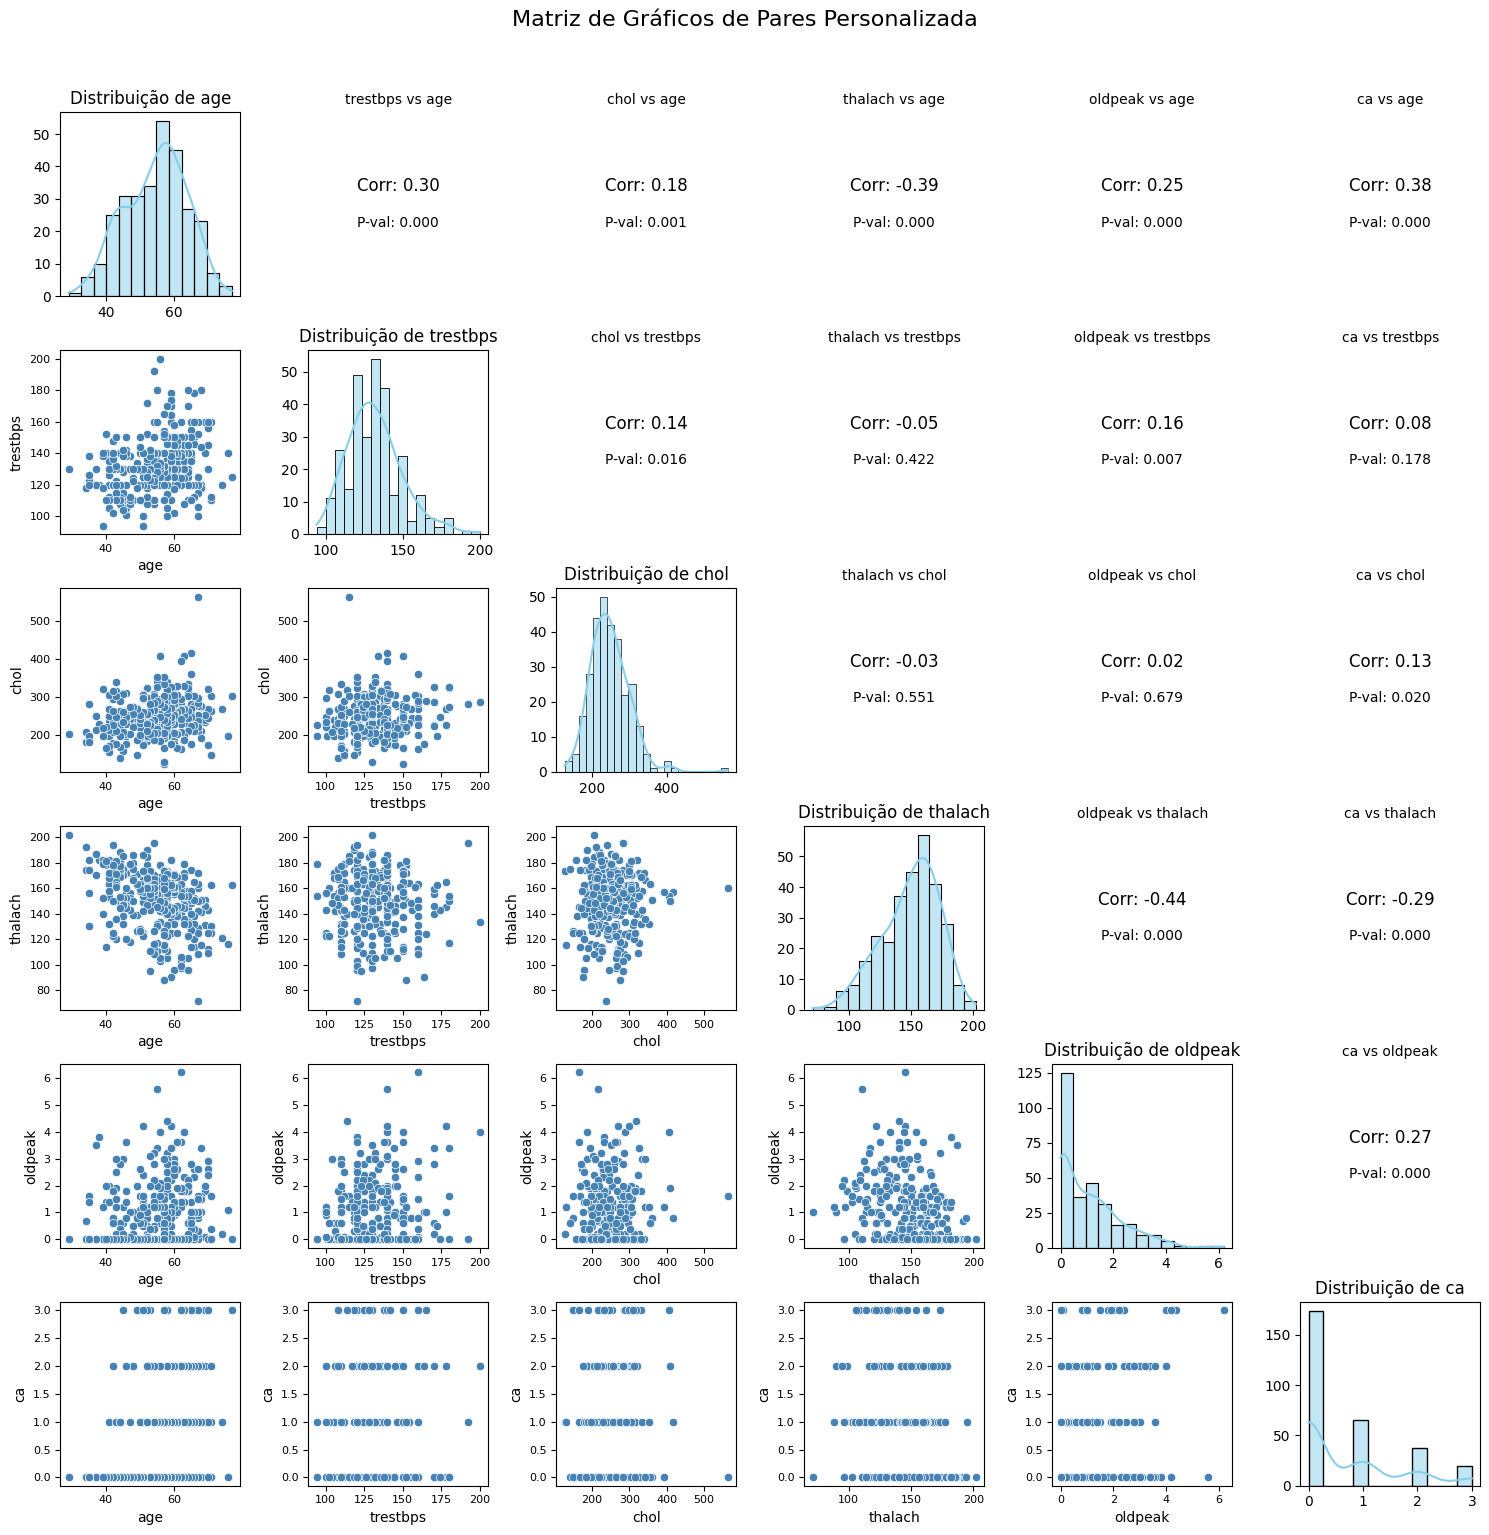

In [ ]:
quantitative_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

create_custom_pair_plot(data, quantitative_vars)

É possível observar uma associação negativa moderada entre Idade e Thalach, o que é esperado, já que, quanto maior a idade, geralmente menor é a frequência cardíaca máxima atingida durante o esforço;


#### Qualitativa vs target (teste qui-quadrado de independência)

H0 : As duas variáveis são independentes

H1 : As duas variáveis não são independentes

In [ ]:
target_var = 'condition'


In [ ]:
from scipy.stats import chi2_contingency

def perform_chi_square_test(col1_data, col2_data, col1_name, col2_name, alpha=0.05):
    """
    Realiza o teste Qui-Quadrado de independência entre duas variáveis categóricas.

    Args:
        col1_data (pd.Series): Dados da primeira variável categórica.
        col2_data (pd.Series): Dados da segunda variável categórica.
        col1_name (str): Nome da primeira variável.
        col2_name (str): Nome da segunda variável.
        alpha (float): Nível de significância para o teste (padrão é 0.05).

    Returns:
        float: O p-valor do teste Qui-Quadrado.
    """
    contingency_table = pd.crosstab(col1_data, col2_data)
    print(f"Tabela de Contingência: {col1_name} vs {col2_name}")
    display(contingency_table)

    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    print(f"  P-valor: {p_value:.3f}")

    return

In [ ]:
perform_chi_square_test(data['sex'], data[target_var], 'sex', target_var)

Tabela de Contingência: sex vs condition


condition,0,1
sex,,
0,71,25
1,89,112


  P-valor: 0.000


A variável Age está relacionada com o target. É possível observar que a maioria das mulheres analisadas não possuem a doença, em contrapartida, o inverso ocorre no caso dos homens.

Em termos de proporção, 26% das mulheres analisadas possuem a doença e cerca de 56% dos homens analisados possuem a doença.

In [ ]:
perform_chi_square_test(data['cp'], data[target_var], 'cp', target_var)

Tabela de Contingência: cp vs condition


condition,0,1
cp,,
0,16,7
1,40,9
2,65,18
3,39,103


  P-valor: 0.000


A variável CP também está correlacionada com o target.

A maioria dos doentes é assintomático

In [ ]:
perform_chi_square_test(data['fbs'], data[target_var], 'fbs', target_var)

Tabela de Contingência: fbs vs condition


condition,0,1
fbs,,
0,137,117
1,23,20


  P-valor: 1.000


O teste não rejeitou a hipótese nula, ou seja, saber se a glicemia do paciente em repouso estava maior que 120mg/dl não ajuda muito a dizer se ele está ou não doente.

In [ ]:
perform_chi_square_test(data['restecg'], data[target_var], 'restecg', target_var)

Tabela de Contingência: restecg vs condition


condition,0,1
restecg,,
0,92,55
1,1,3
2,67,79


  P-valor: 0.008


A maioria dos pacientes normais(62%) não possuem a doença, e a maioria dos pacientes com hipertrofia ventricular (54%) possuem a doença.

Como há poucos indivíduos com Anormalidade ST-T, talvez seja interessante unir isso ao grupo de hipertrofia ventricular, formando um único grupo (alterado)

In [ ]:
perform_chi_square_test(data['exang'], data[target_var], 'exang', target_var)

Tabela de Contingência: exang vs condition


condition,0,1
exang,,
0,137,63
1,23,74


  P-valor: 0.000


Geralmente, quando o paciente sente dor durante o exercício, aumenta o risco de ter a doença.

In [ ]:
perform_chi_square_test(data['slope'], data[target_var], 'slope', target_var)

Tabela de Contingência: slope vs condition


condition,0,1
slope,,
0,103,36
1,48,89
2,9,12


  P-valor: 0.000


Quando o slope é ascendente , o risco de ter a doença é menor, como esperado.

entretando o risco aumenta quando o slope é plano.

Como o número de casos observados com slope descendente é pequeno, não é possível fazer afirmaçoes sobre ele.

In [ ]:
perform_chi_square_test(data['ca'], data[target_var], 'ca', target_var)

Tabela de Contingência: ca vs condition


condition,0,1
ca,,
0,129,45
1,21,44
2,7,31
3,3,17


  P-valor: 0.000


A maioria das pessoas com nenhum vaso calcificado (73%) não possuem a doença; Entretando, a maioria das pessoas com pelo menos um vaso calcificado (74%) possuem a doença

In [ ]:
perform_chi_square_test(data['thal'], data[target_var], 'thal', target_var)

Tabela de Contingência: thal vs condition


condition,0,1
thal,,
0,127,37
1,6,12
2,27,88


  P-valor: 0.000


Quando o sangue chega em todas as partes do coração durante o reforço e após o esforço, o risco de ter a doença é muito menor.

Quando o coração parece normal em repouso, mas "falta sangue" durante o esforço, o risco aumenta.

#### Quantitativa vs target (teste mann-whitney U)

Como os dados não são normalmente distribuídos, optamos por um teste não paramétrico

H0 : Os grupos são iguais
H1 : OS grupos não são iguais


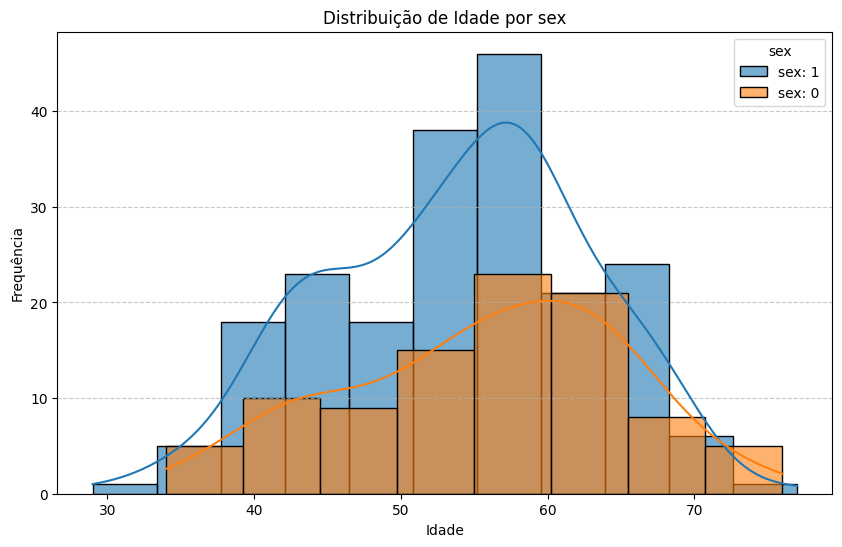

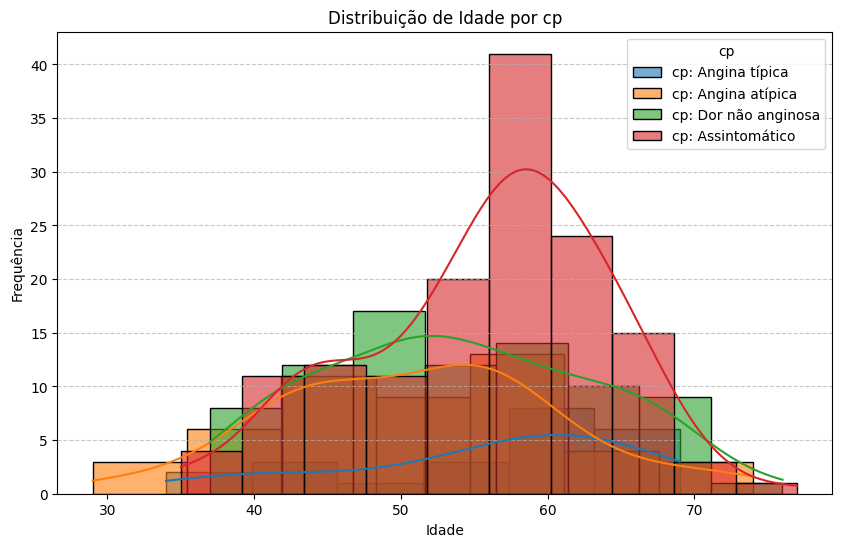

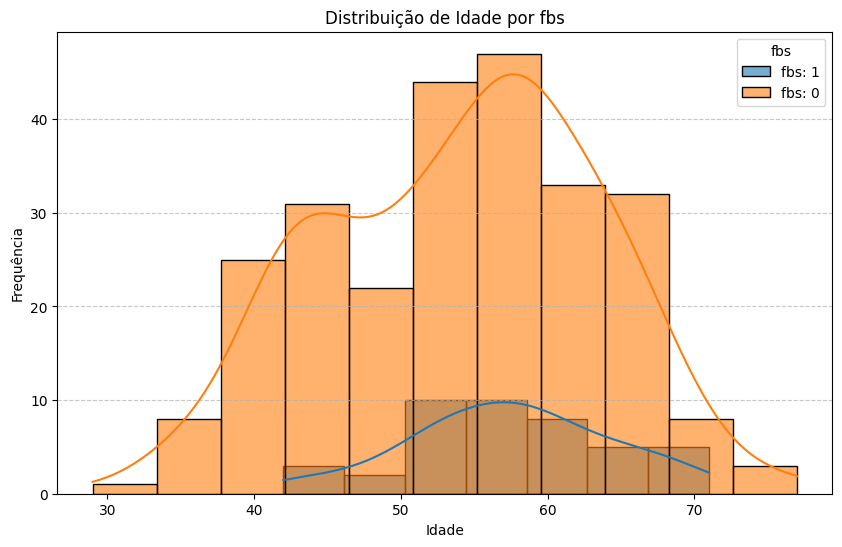

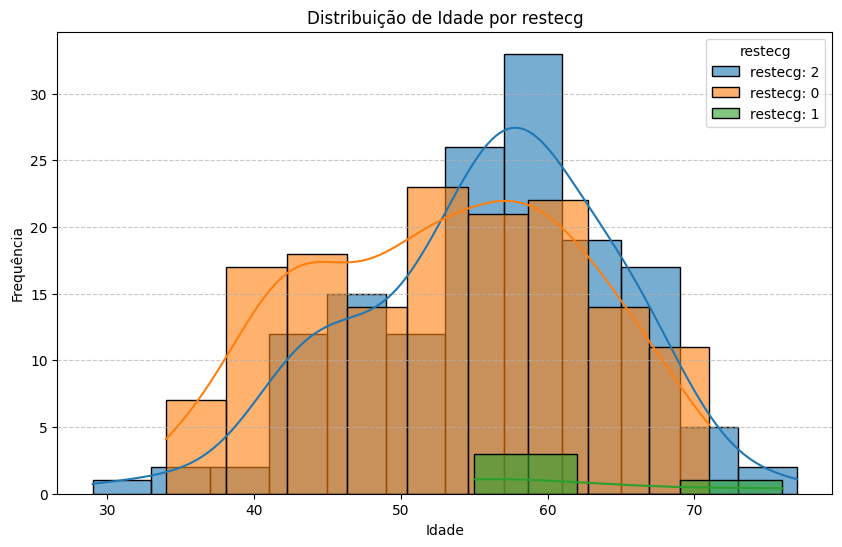

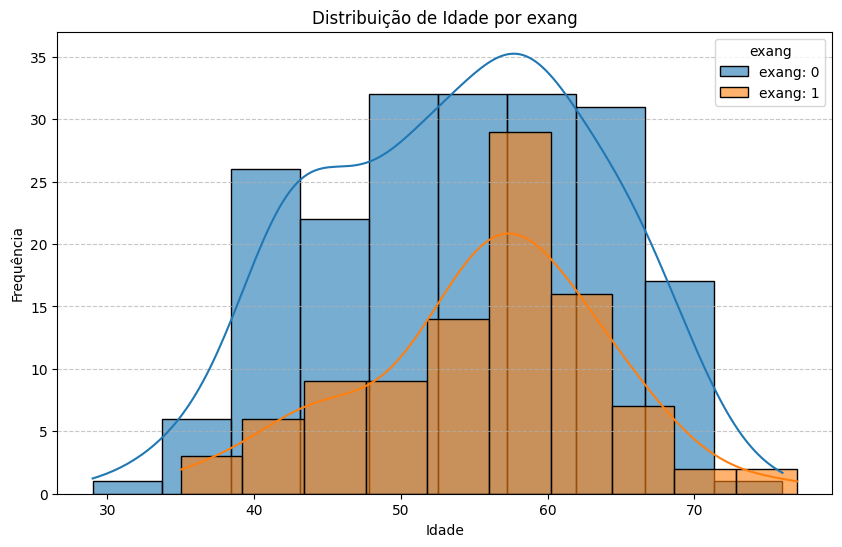

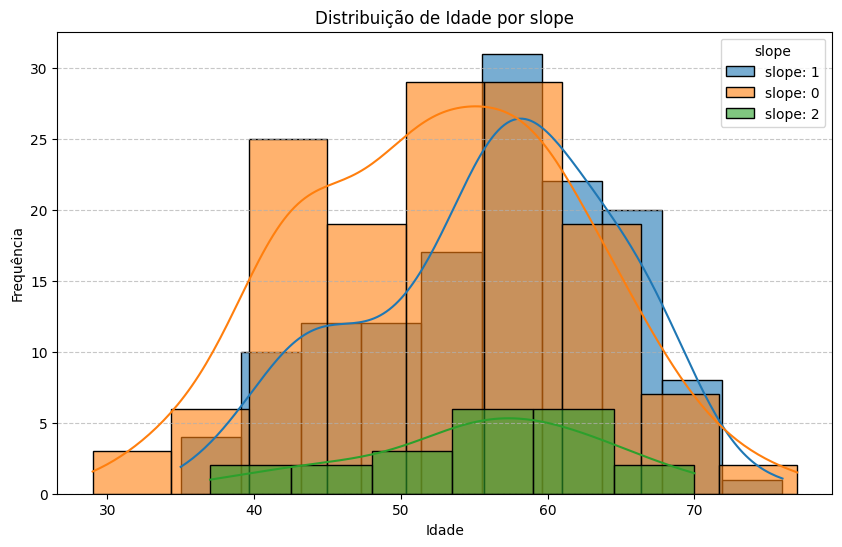

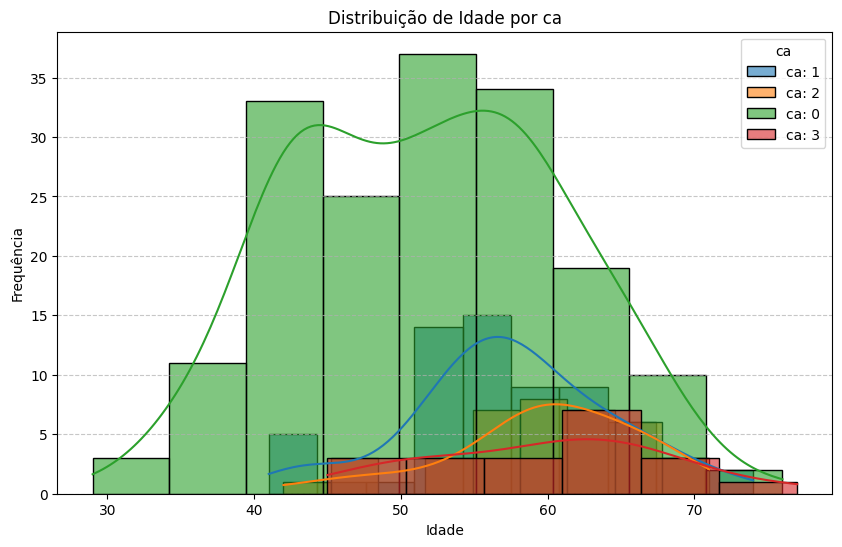

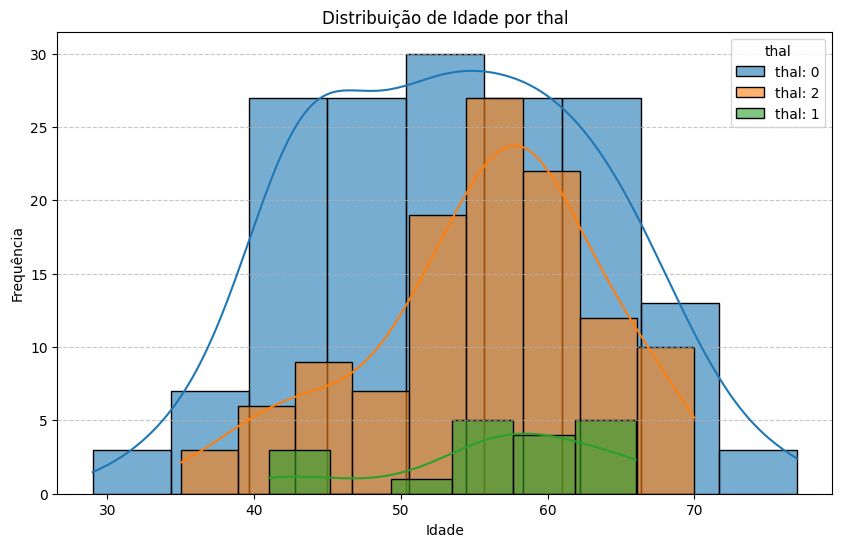

In [ ]:
def plot_age_histograms_by_categorical(df, categorical_vars, age_col='age'):
    """
    Gera histogramas sobrepostos da distribuição da idade,
    condicionados por cada categoria de variáveis categóricas.

    Args:
        df (pd.DataFrame): O DataFrame contendo os dados.
        categorical_vars (list): Uma lista de nomes das variáveis categóricas.
        age_col (str): O nome da coluna da idade (padrão é 'age').
    """
    for cat_var in categorical_vars:
        plt.figure(figsize=(10, 6))
        unique_categories = df[cat_var].unique()

        for category in unique_categories:
            subset_age = df[df[cat_var] == category][age_col]
            sns.histplot(subset_age, kde=True, label=f'{cat_var}: {category}', alpha=0.6)

        plt.title(f'Distribuição de Idade por {cat_var}')
        plt.xlabel('Idade')
        plt.ylabel('Frequência')
        plt.legend(title=cat_var)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

# Identificar as variáveis categóricas (excluindo 'condition' que já foi analisada como target)
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# As variáveis 'cp', 'ca', 'thal' e 'sex' já foram mapeadas ou são numéricas com poucos valores,
# o que as torna adequadas para serem tratadas como categóricas para esta visualização.
# 'cp' já foi mapeada para strings em uma célula anterior, vou usá-la como está.
# As outras (sex, fbs, restecg, exang, slope, ca, thal) são numéricas e representam categorias.

# Certifique-se que 'cp' está usando o mapeamento correto para o gráfico
data_for_plotting = data.copy()
data_for_plotting['cp'] = data_for_plotting['cp'].replace(mapeamento_cp)

plot_age_histograms_by_categorical(data_for_plotting, categorical_cols, age_col='age')


In [ ]:
from scipy.stats import mannwhitneyu

def plot_violin_by_condition(df, var_name, target_var='condition', target_labels=['Sem Doença', 'Com Doença']):
    """
    Gera uma tabela comparativa de estatísticas e um gráfico de violino.
    """

    # 1. Preparando os dados dos grupos
    group0 = df[df[target_var] == 0][var_name]
    group1 = df[df[target_var] == 1][var_name]

    # 2. Criando a Tabela Comparativa de Estatísticas
    stats0 = group0.describe()
    stats1 = group1.describe()

    # Adicionando Curtose e Assimetria manualmente
    stats0['kurtosis'] = group0.kurtosis()
    stats0['skewness'] = group0.skew()
    stats1['kurtosis'] = group1.kurtosis()
    stats1['skewness'] = group1.skew()

    # Concatenando as duas séries em um DataFrame (Lado a Lado)
    df_stats = pd.concat([stats0, stats1], axis=1)
    df_stats.columns = target_labels

    print(f"\n=== Tabela Comparativa: {var_name} ===")
    display(df_stats.round(3)) # Arredonda para 3 casas decimais para ficar limpo

    # 3. Teste de Mann-Whitney U
    print(f"\n--- Teste de Mann-Whitney U ---")
    stat, p_value = mannwhitneyu(group0, group1, alternative='two-sided')
    print(f"Estatística U: {stat:.2f} | P-value: {p_value:.4f}")

    sig = "Sim" if p_value < 0.05 else "Não"
    print(f"Diferença Significativa (p < 0.05)? {sig}")

    # 4. Gráfico de Violino
    plt.figure(figsize=(8, 6))
    temp_df = df.copy()
    temp_df['_dummy'] = '' # Truque para centralizar o violino split

    sns.violinplot(x='_dummy', y=var_name, hue=target_var, data=temp_df,
                   palette='muted', split=True, inner="quartile")

    plt.title(f'Comparação de {var_name}: {target_labels[0]} vs {target_labels[1]}')
    plt.xlabel('')
    plt.ylabel(var_name)
    plt.legend(title='Condição', labels=target_labels)
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.show()




=== Tabela Comparativa: age ===


,Sem Doença,Com Doença
count,160.000,137.000
mean,52.644,56.759
std,9.551,7.900
min,29.000,35.000
25%,44.750,53.000
50%,52.000,58.000
75%,59.000,62.000
max,76.000,77.000
kurtosis,-0.618,0.233
skewness,0.121,-0.586



--- Teste de Mann-Whitney U ---
Estatística U: 7916.50 | P-value: 0.0000
Diferença Significativa (p < 0.05)? Sim


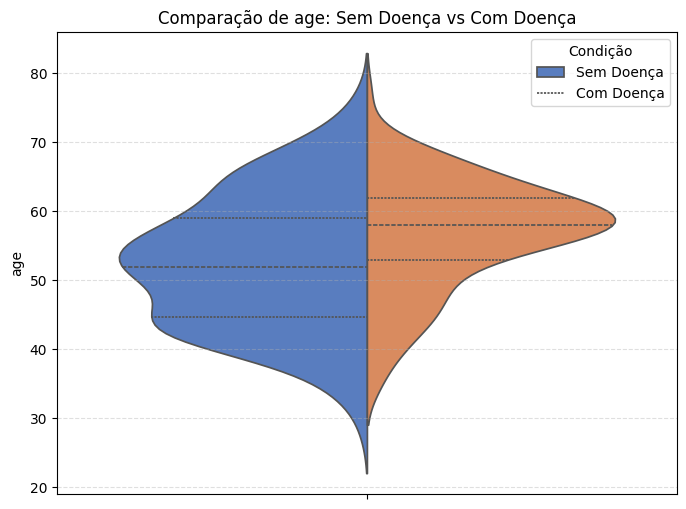

In [ ]:
plot_violin_by_condition(data, 'age', target_var='condition', target_labels=['Sem Doença', 'Com Doença'])

há uma dispersão maior da idade quando se trata dos indivíduos sem a doença...

Entretando, os indivíduos doentes tendem a ter idade mais avançada


=== Tabela Comparativa: trestbps ===


,Sem Doença,Com Doença
count,160.000,137.000
mean,129.175,134.635
std,16.374,18.897
min,94.000,100.000
25%,120.000,120.000
50%,130.000,130.000
75%,140.000,145.000
max,180.000,200.000
kurtosis,0.346,0.777
skewness,0.443,0.819



--- Teste de Mann-Whitney U ---
Estatística U: 9292.50 | P-value: 0.0235
Diferença Significativa (p < 0.05)? Sim


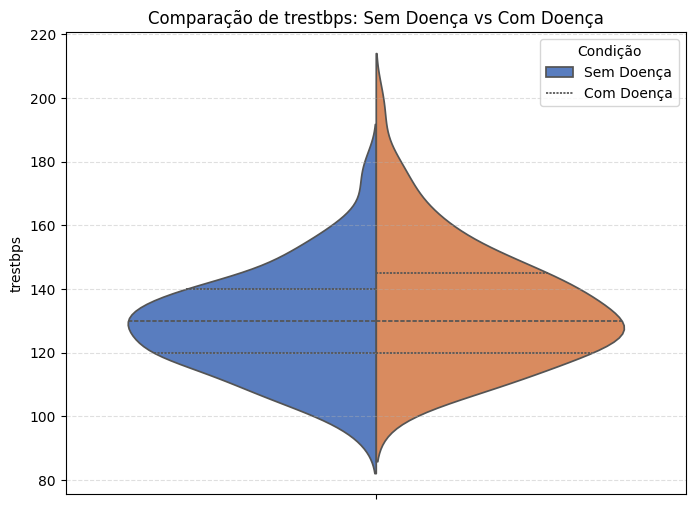

In [ ]:
plot_violin_by_condition(data, 'trestbps', target_var='condition', target_labels=['Sem Doença', 'Com Doença'])

Ao nível de 5%, a diferença foi dada como significativa. É possível observar que o primeiro e o segundo quartil são aproximadamente iguais em ambos os grupos. Entretando, a pressão no grupo dos doentes, tende a alcançar valores maiores que a do grupo dos saudáveis.


=== Tabela Comparativa: chol ===


,Sem Doença,Com Doença
count,160.000,137.000
mean,243.494,251.854
std,53.758,49.680
min,126.000,131.000
25%,208.750,218.000
50%,235.500,253.000
75%,268.250,284.000
max,564.000,409.000
kurtosis,7.617,0.323
skewness,1.736,0.283



--- Teste de Mann-Whitney U ---
Estatística U: 9492.00 | P-value: 0.0467
Diferença Significativa (p < 0.05)? Sim


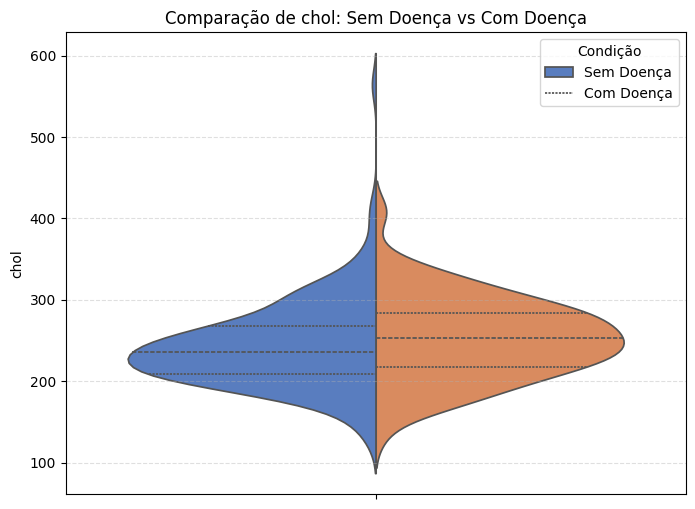

In [ ]:
plot_violin_by_condition(data, 'chol', target_var='condition', target_labels=['Sem Doença', 'Com Doença'])

é possível observar que o maior nível de colesterol está no grupo das pessoas sem a doença, então possívelmente o colesterol não ajuda tanto a discriminar a doença. Entretando, quando olhamos para a massa de dados, é possível observar que os quartis do grupo dos doentes são levemente maiores que os do grupo dos não doentes.


=== Tabela Comparativa: thalach ===


,Sem Doença,Com Doença
count,160.000,137.000
mean,158.581,139.109
std,19.043,22.711
min,96.000,71.000
25%,149.000,125.000
50%,161.000,142.000
75%,172.000,157.000
max,202.000,195.000
kurtosis,0.507,-0.226
skewness,-0.692,-0.292



--- Teste de Mann-Whitney U ---
Estatística U: 16399.00 | P-value: 0.0000
Diferença Significativa (p < 0.05)? Sim


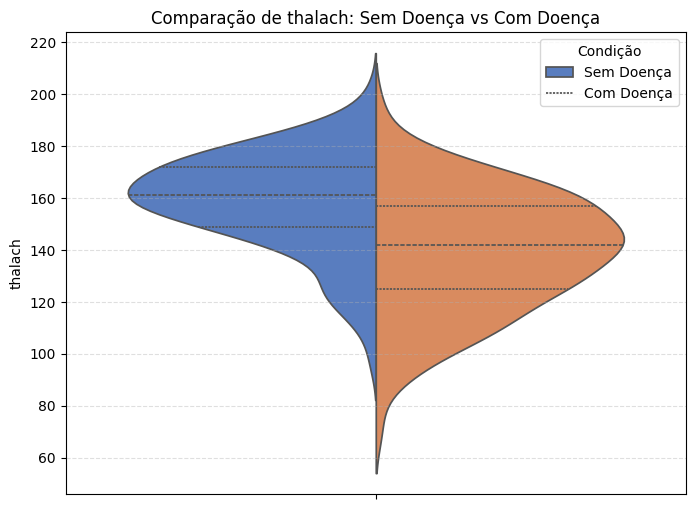

In [ ]:
plot_violin_by_condition(data, 'thalach', target_var='condition', target_labels=['Sem Doença', 'Com Doença'])

Como esperado, as pessoas saudáveis tendem a alcançar uma frequência cardíaca máxima maior, durante o esforço, do que as pessoas doentes.


=== Tabela Comparativa: oldpeak ===


,Sem Doença,Com Doença
count,160.000,137.000
mean,0.599,1.589
std,0.787,1.305
min,0.000,0.000
25%,0.000,0.600
50%,0.200,1.400
75%,1.100,2.500
max,4.200,6.200
kurtosis,3.039,0.383
skewness,1.607,0.729



--- Teste de Mann-Whitney U ---
Estatística U: 5833.50 | P-value: 0.0000
Diferença Significativa (p < 0.05)? Sim


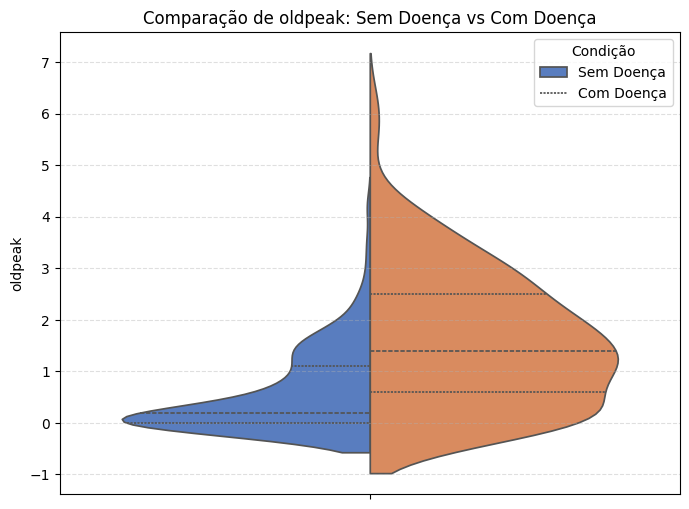

In [ ]:
plot_violin_by_condition(data, 'oldpeak', target_var='condition', target_labels=['Sem Doença', 'Com Doença'])

Os dois grupos são muito diferentes, a curtose do grupo sem a doença é muito alta e ela é bastante assimétrica; ou seja, os valores de oldpeak do grupo doente tende a ser baixo. Por outro lado, no grupo dos doentes, a mediana de oldpeak é 1.4mm; o valor de oldpeak no grupo dos doentes alcança valores maiores que no grupo dos saudáveis.

ou seja, as pessoas saudáveis tendem a ter valores de oldpeak menores (próximos a zero) do que no grupo das pessoas doentes.


=== Tabela Comparativa: ca ===


,Sem Doença,Com Doença
count,160.000,137.000
mean,0.275,1.146
std,0.634,1.019
min,0.000,0.000
25%,0.000,0.000
50%,0.000,1.000
75%,0.000,2.000
max,3.000,3.000
kurtosis,6.403,-0.961
skewness,2.549,0.422



--- Teste de Mann-Whitney U ---
Estatística U: 5426.50 | P-value: 0.0000
Diferença Significativa (p < 0.05)? Sim


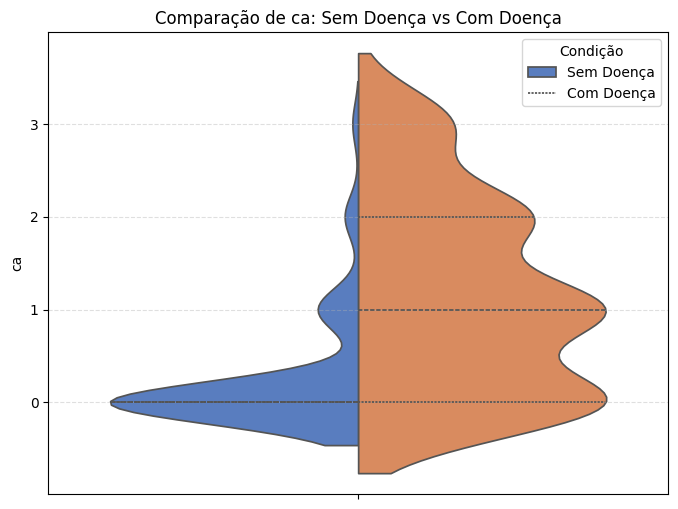

In [ ]:
plot_violin_by_condition(data, 'ca', target_var='condition', target_labels=['Sem Doença', 'Com Doença'])

O terceiro quartil é igual a zero, ou seja, 75% das pessoas saudáveis possuem 0 vasos calcificados.

No grupo das pessoas doentes, isso muda, geralemente elas possuem pelo menos um vaso calcificado.

### Outras análises

#### Análise das pessoas assintomáticas (cp=3)

In [ ]:
data_f = data[data['cp'] == 3]

,proportion
sex,
1,71.830986
0,28.169014


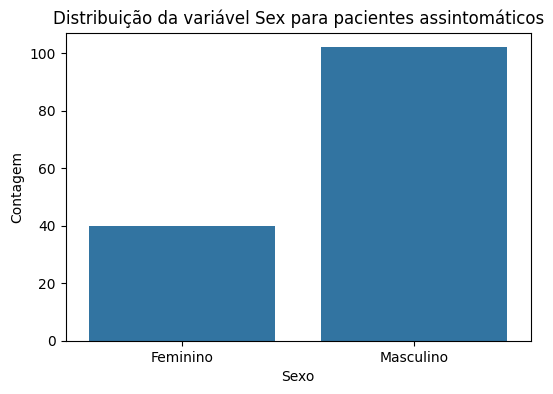

In [ ]:
proportions_sex_asymptomatic = data_f['sex'].value_counts(normalize=True) * 100
display(proportions_sex_asymptomatic)

plt.figure(figsize=(6, 4))
sns.countplot(x=data_f['sex'])
plt.title('Distribuição da variável Sex para pacientes assintomáticos')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['Feminino', 'Masculino'])
plt.show()

Maioria dos homens e uma pequena parte das mulheres são assintomáticos .

In [ ]:
proportions_cp_asymptomatic = data_f['ca'].value_counts(normalize=True) * 100
display(proportions_cp_asymptomatic)


,proportion
ca,
0,45.774648
1,23.943662
2,20.422535
3,9.859155


A maioria dos pacientes assintomáticos não possuem vasos calcificados

,proportion
exang,
1,54.929577
0,45.070423


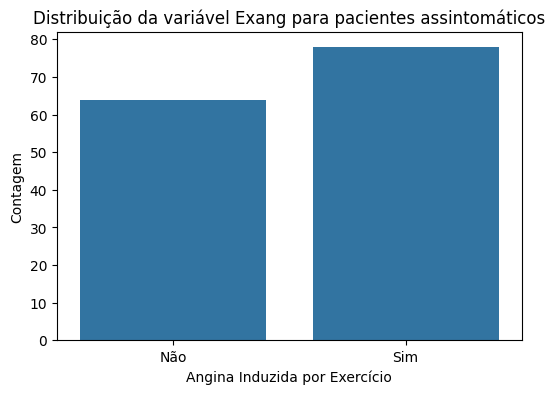

In [ ]:
proportions_exang_asymptomatic = data_f['exang'].value_counts(normalize=True) * 100
display(proportions_exang_asymptomatic)

plt.figure(figsize=(6, 4))
sns.countplot(x=data_f['exang'])
plt.title('Distribuição da variável Exang para pacientes assintomáticos')
plt.xlabel('Angina Induzida por Exercício')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])
plt.show()

A maioria dos pacientes assintomáticos sentiram dor ao fazer exercícios de esforço

Porcentagem de Assintomáticos em cada tipo de Slope:


,is_asymptomatic
slope,
0,35.251799
1,59.854015
2,52.380952


/tmp/ipython-input-443163925.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportions.index, y=proportions.values, palette='viridis')


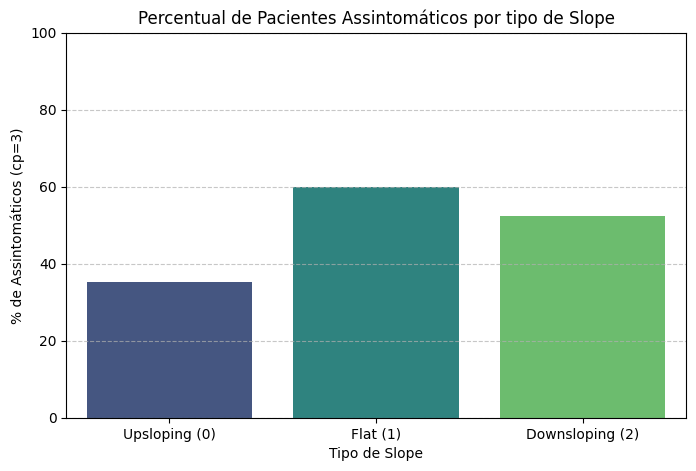

In [ ]:
# 1. Criamos uma coluna booleana para facilitar o cálculo: True se for assintomático
data['is_asymptomatic'] = data['cp'] == 3

# 2. Agrupamos por 'slope' e calculamos a média da coluna booleana (que dá a proporção)
# Multiplicamos por 100 para ter o percentual
proportions = data.groupby('slope')['is_asymptomatic'].mean() * 100

print("Porcentagem de Assintomáticos em cada tipo de Slope:")
display(proportions)

# 3. Visualização
plt.figure(figsize=(8, 5))
sns.barplot(x=proportions.index, y=proportions.values, palette='viridis')

plt.title('Percentual de Pacientes Assintomáticos por tipo de Slope')
plt.xlabel('Tipo de Slope')
plt.ylabel('% de Assintomáticos (cp=3)')
plt.xticks(ticks=[0, 1, 2], labels=['Upsloping (0)', 'Flat (1)', 'Downsloping (2)'])
plt.ylim(0, 100) # Fixar de 0 a 100 para não distorcer a percepção
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
proportions_slope_asymptomatic = data_f['slope'].value_counts(normalize=True) * 100
display(proportions_slope_asymptomatic)

,proportion
slope,
1,57.746479
0,34.507042
2,7.746479


A maioria das pessoas com slope descendente ou plano são assintomáticas

##### Quantitativas x target


=== Tabela Comparativa: age ===


,Sem Doença,Com Doença
count,39.000,103.000
mean,54.077,56.505
std,8.710,8.046
min,35.000,35.000
25%,46.500,52.500
50%,54.000,58.000
75%,60.500,62.000
max,71.000,77.000
kurtosis,-0.825,0.280
skewness,-0.085,-0.587



--- Teste de Mann-Whitney U ---
Estatística U: 1667.50 | P-value: 0.1193
Diferença Significativa (p < 0.05)? Não


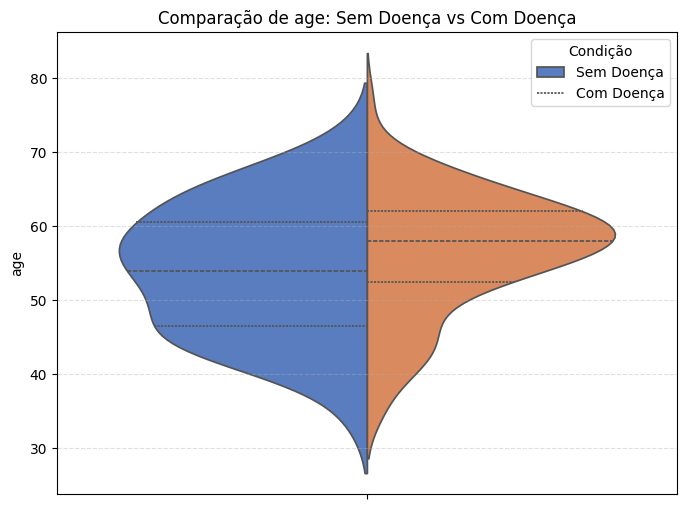

In [ ]:
plot_violin_by_condition(data_f, 'age', target_var='condition', target_labels=['Sem Doença', 'Com Doença'])


Não há diferença significativa na idade entre os assintomáticos que possuem a doença e os que não possuem


=== Tabela Comparativa: trestbps ===


,Sem Doença,Com Doença
count,39.000,103.000
mean,127.564,134.000
std,16.771,18.520
min,100.000,100.000
25%,113.500,120.000
50%,130.000,130.000
75%,138.000,145.000
max,180.000,200.000
kurtosis,1.145,0.888
skewness,0.652,0.781



--- Teste de Mann-Whitney U ---
Estatística U: 1610.50 | P-value: 0.0686
Diferença Significativa (p < 0.05)? Não


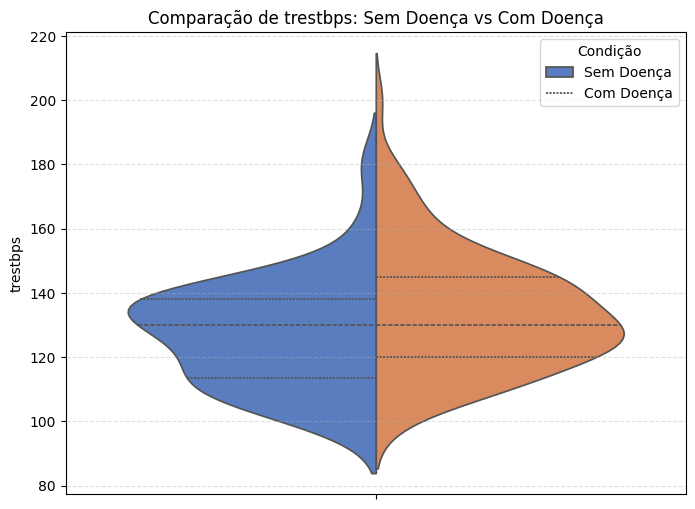

In [ ]:
plot_violin_by_condition(data_f, 'trestbps', target_var='condition', target_labels=['Sem Doença', 'Com Doença'])



=== Tabela Comparativa: chol ===


,Sem Doença,Com Doença
count,39.000,103.000
mean,245.333,252.961
std,48.920,52.898
min,149.000,131.000
25%,210.000,212.000
50%,236.000,254.000
75%,264.500,289.000
max,394.000,409.000
kurtosis,1.400,0.126
skewness,0.892,0.298



--- Teste de Mann-Whitney U ---
Estatística U: 1794.00 | P-value: 0.3280
Diferença Significativa (p < 0.05)? Não


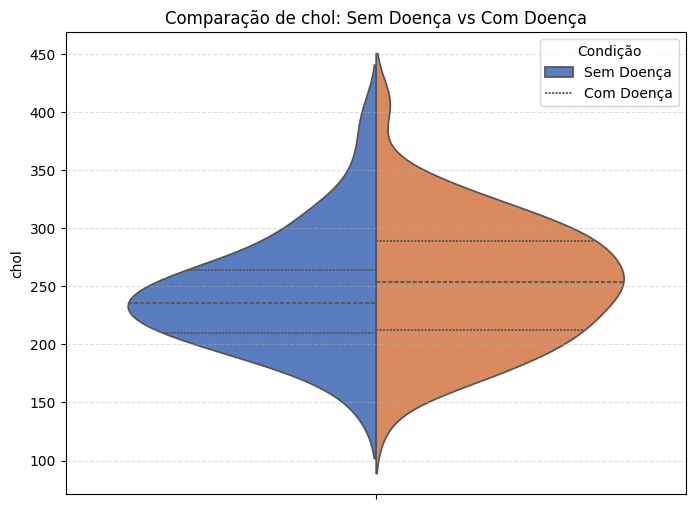

In [ ]:
plot_violin_by_condition(data_f, 'chol', target_var='condition', target_labels=['Sem Doença', 'Com Doença'])



=== Tabela Comparativa: thalach ===


,Sem Doença,Com Doença
count,39.000,103.000
mean,152.487,136.039
std,21.276,22.236
min,105.000,71.000
25%,141.000,121.000
50%,154.000,140.000
75%,163.000,154.000
max,186.000,181.000
kurtosis,-0.471,-0.299
skewness,-0.299,-0.303



--- Teste de Mann-Whitney U ---
Estatística U: 2802.50 | P-value: 0.0003
Diferença Significativa (p < 0.05)? Sim


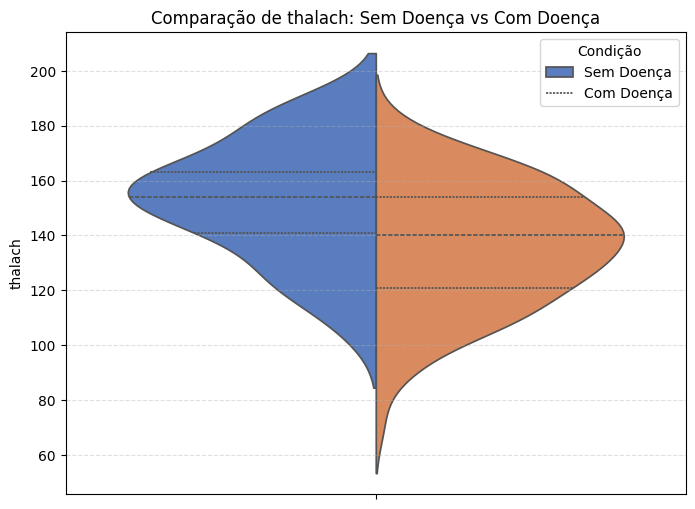

In [ ]:
plot_violin_by_condition(data_f, 'thalach', target_var='condition', target_labels=['Sem Doença', 'Com Doença'])



=== Tabela Comparativa: oldpeak ===


,Sem Doença,Com Doença
count,39.000,103.000
mean,0.582,1.689
std,0.754,1.339
min,0.000,0.000
25%,0.000,0.800
50%,0.300,1.500
75%,1.100,2.600
max,3.000,6.200
kurtosis,1.740,0.475
skewness,1.468,0.724



--- Teste de Mann-Whitney U ---
Estatística U: 1008.50 | P-value: 0.0000
Diferença Significativa (p < 0.05)? Sim


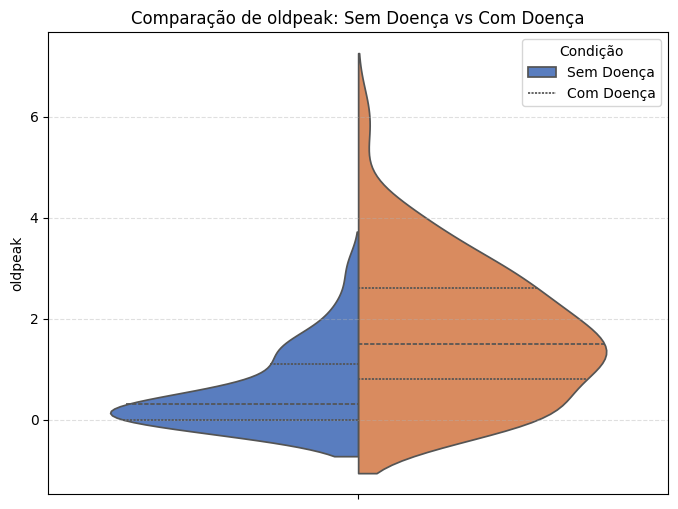

In [ ]:
plot_violin_by_condition(data_f, 'oldpeak', target_var='condition', target_labels=['Sem Doença', 'Com Doença'])



=== Tabela Comparativa: ca ===


,Sem Doença,Com Doença
count,39.000,103.000
mean,0.231,1.214
std,0.667,1.016
min,0.000,0.000
25%,0.000,0.000
50%,0.000,1.000
75%,0.000,2.000
max,3.000,3.000
kurtosis,9.055,-1.041
skewness,3.062,0.300



--- Teste de Mann-Whitney U ---
Estatística U: 870.50 | P-value: 0.0000
Diferença Significativa (p < 0.05)? Sim


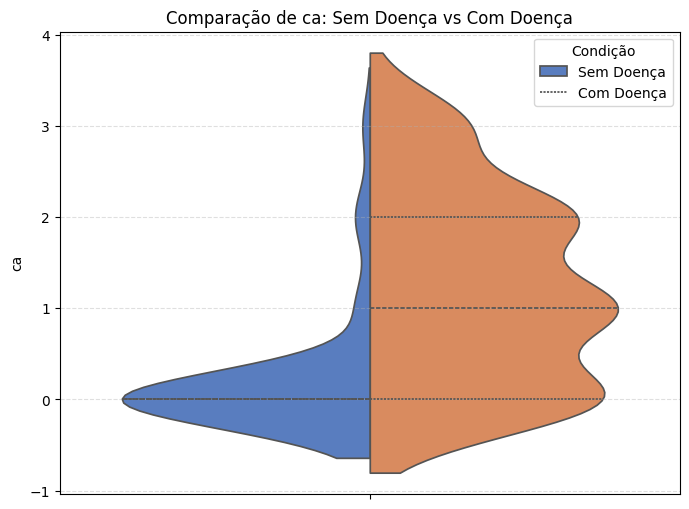

In [ ]:
plot_violin_by_condition(data_f, 'ca', target_var='condition', target_labels=['Sem Doença', 'Com Doença'])


Aqui, a diferença de idade não é significativa entre os dois grupos. A hipótese nula não foi rejeitada quando analisamos as variáveis trestbps e chol, ao nível de 5%. Ou seja, no grupo dos assintomáticos, não há diferença significativa, entre os doentes e saudáveis, de idade, pressão arterial ou glicemia

##### Qualitativas x target

In [ ]:
perform_chi_square_test(data_f['sex'], data_f[target_var], 'sex', target_var)

Tabela de Contingência: sex vs condition


condition,0,1
sex,,
0,18,22
1,21,81


  P-valor: 0.006


 A maioria dos homens assintomáticos possuem a doença (79%)

In [ ]:
perform_chi_square_test(data_f['fbs'], data_f[target_var], 'fbs', target_var)

Tabela de Contingência: fbs vs condition


condition,0,1
fbs,,
0,38,88
1,1,15


  P-valor: 0.085


Não significativo.

In [ ]:
perform_chi_square_test(data_f['restecg'], data_f[target_var], 'restecg', target_var)

Tabela de Contingência: restecg vs condition


condition,0,1
restecg,,
0,22,39
1,0,3
2,17,61


  P-valor: 0.097


não significativo

In [ ]:
perform_chi_square_test(data_f['exang'], data_f[target_var], 'exang', target_var)

Tabela de Contingência: exang vs condition


condition,0,1
exang,,
0,29,35
1,10,68


  P-valor: 0.000


In [ ]:
perform_chi_square_test(data_f['slope'], data_f[target_var], 'slope', target_var)

Tabela de Contingência: slope vs condition


condition,0,1
slope,,
0,23,26
1,16,66
2,0,11


  P-valor: 0.000


Todos os pacientes que não possuem sintomas e o slope é descendente possuem a doença



In [ ]:
perform_chi_square_test(data_f['ca'], data_f[target_var], 'ca', target_var)

Tabela de Contingência: ca vs condition


condition,0,1
ca,,
0,34,31
1,2,32
2,2,27
3,1,13


  P-valor: 0.000


Quando o paciente é assintomático e possui pelo menos um vaso calcificado, o risco de ter a doença é maior;

A frequência relativa de pessoas doentes que são assintomáticas e possuem pelo menos um vaso calcificado é de 93%

In [ ]:
perform_chi_square_test(data_f['thal'], data_f[target_var], 'thal', target_var)

Tabela de Contingência: thal vs condition


condition,0,1
thal,,
0,29,24
1,3,9
2,7,70


  P-valor: 0.000


2/3 dos assintomáticos possui partes de tecido morto; ou seja, possivelmente já sofreram infarto antes.

Aqui também é possível observar que o risco de ter a doença, dado thal=1 ou 2 é maior, em relaçao ao público geral